<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/Queda_nao_livre_Euler_vs_Analitica_com_Area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Queda não livre — arrasto linear **b·A** — Euler vs. análise

Modelo (velocidade para baixo positiva):
$$ \frac{dv}{dt} = g - \frac{b\,A}{m}\,v, $$
onde **A** é a área efetiva (m²) e **b** é o coeficiente de arrasto **por unidade de área**.

Solução analítica:
$$ v(t) = v_\infty + (v_0 - v_\infty) e^{-t/\tau},\quad v_\infty = \frac{mg}{bA},\; \tau = \frac{m}{bA}. $$

Esquema de **Euler explícito**:
$$ v_{n+1} = v_n + h\left(g - \frac{bA}{m}\,v_n\right). $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Parâmetros (edite livremente)

In [2]:
m = 80.0        # kg
b = 60.0        # N*s/m^3  (drag per unit area in a linear model)
A = 0.7         # m^2      (effective area)
g = 9.81        # m/s^2 (downward positive)
v0 = 0.0        # m/s
t_max = 20.0    # s
n_points = 500  # time samples


## Funções

In [3]:
def velocity_linear_drag_analytical_area(t, m, b, A, g, v0):
    """Analytical solution for dv/dt = g - (b*A/m)*v (linear drag).
    Returns v(t) as numpy array.
    """
    k = (b * A) / m           # 1/s
    v_inf = g / k             # = m*g/(b*A)
    return v_inf + (v0 - v_inf) * np.exp(-k * t)

def euler_velocity_area(t, m, b, A, g, v0):
    """Forward Euler for dv/dt = g - (b*A/m)*v over grid t."""
    v = np.zeros_like(t)
    v[0] = v0
    h = t[1] - t[0] if t.size > 1 else 0.0
    for n in range(0, t.size - 1):
        rhs = g - (b * A / m) * v[n]
        v[n + 1] = v[n] + h * rhs
    return v


Max abs error: 0.07296325198399778


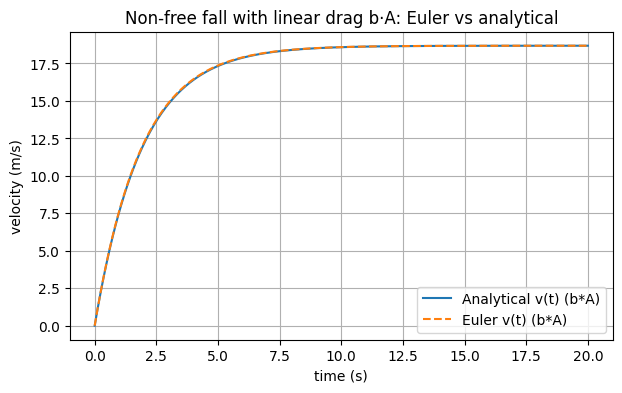

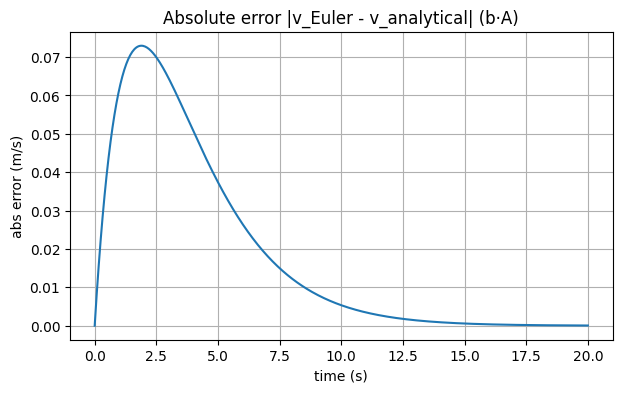

In [4]:
# Time grid
t = np.linspace(0.0, t_max, n_points)

# Solutions
v_an = velocity_linear_drag_analytical_area(t, m, b, A, g, v0)
v_eu = euler_velocity_area(t, m, b, A, g, v0)

# Error
abs_err = np.abs(v_eu - v_an)
print('Max abs error:', float(np.max(abs_err)))

# Plot curves
plt.figure(figsize=(7,4))
plt.plot(t, v_an, label='Analytical v(t) (b*A)')
plt.plot(t, v_eu, linestyle='--', label='Euler v(t) (b*A)')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Non-free fall with linear drag b·A: Euler vs analytical')
plt.legend()
plt.grid(True)
plt.show()

# Plot absolute error
plt.figure(figsize=(7,4))
plt.plot(t, abs_err)
plt.xlabel('time (s)')
plt.ylabel('abs error (m/s)')
plt.title('Absolute error |v_Euler - v_analytical| (b·A)')
plt.grid(True)
plt.show()


### Notas
- Aumentar **A** (ou **b**) diminui a velocidade terminal: $v_\infty=\dfrac{mg}{bA}$.
- A constante de tempo também muda: $\tau = \dfrac{m}{bA}$.
- Refinar a malha (aumentar `n_points`) reduz o erro do Euler.